# Averages Hide Variation: Why Models Using Averages May Fail

This notebook demonstrates a critical problem: **averages hide variation**, and models using averages assume reality matches the average, which rarely happens.

Understanding this is essential because:
- Averages summarize data but hide the variation around them
- Reality has variation: some values above average, some below
- Models using averages assume all values equal the average
- When actual values differ, model recommendations fail


## Key Concepts

**Averages Hide Variation**:
- An average of 100 doesn't mean every value is 100
- Values are distributed around the average
- Some above, some below, the distribution matters

**Models Using Averages**:
- Assume all values equal the average
- Don't account for variation
- Fail when actual values differ from the average

**The Problem**:
- Higher than average → Stockouts, delays, capacity issues
- Lower than average → Overstock, wasted resources
- Variable → Both problems occur

**Critical insight**: Consider variation, not just averages. Test what happens if values differ from the average.


## Scenario: Processing Time Optimization

You manage a production line. Processing times vary:
- **Observed times**: 8, 9, 9, 10, 10, 10, 11, 11, 12 minutes
- **Average**: 10 minutes

**The model uses the average (10 minutes)** to schedule production and recommends a specific schedule.

**But what happens when actual times vary?** Some units take 8 minutes, some take 12 minutes. Does the schedule still work?


## Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Step 2: Data with Variation

Let's look at the actual data and see how the average hides variation:


OBSERVED PROCESSING TIMES:
  Data: [8, 9, 9, 10, 10, 10, 11, 11, 12] minutes
  Average: 10.0 minutes
  Standard Deviation: 1.15 minutes
  Range: 8 to 12 minutes

⚠️  KEY INSIGHT: Average is 10, but times vary from 8 to 12!
  The average doesn't show this variation!


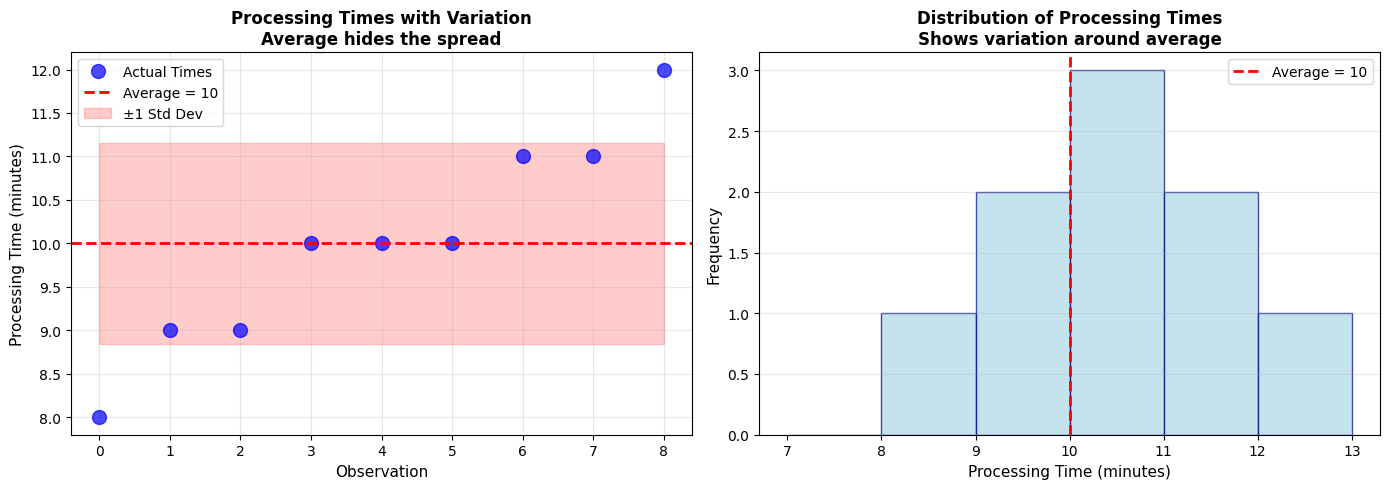

In [2]:
# Observed processing times
processing_times = [8, 9, 9, 10, 10, 10, 11, 11, 12]
avg_time = np.mean(processing_times)
std_time = np.std(processing_times)
min_time = min(processing_times)
max_time = max(processing_times)

print("OBSERVED PROCESSING TIMES:")
print(f"  Data: {processing_times} minutes")
print(f"  Average: {avg_time:.1f} minutes")
print(f"  Standard Deviation: {std_time:.2f} minutes")
print(f"  Range: {min_time} to {max_time} minutes")
print(f"\n⚠️  KEY INSIGHT: Average is {avg_time:.0f}, but times vary from {min_time} to {max_time}!")
print("  The average doesn't show this variation!")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Data points with average
ax1.plot(range(len(processing_times)), processing_times, 'o', color='blue', 
         markersize=10, label='Actual Times', alpha=0.7)
ax1.axhline(y=avg_time, color='red', linestyle='--', linewidth=2, 
            label=f'Average = {avg_time:.0f}')
ax1.fill_between(range(len(processing_times)), 
                 avg_time - std_time, avg_time + std_time, 
                 alpha=0.2, color='red', label='±1 Std Dev')
ax1.set_xlabel('Observation', fontsize=11)
ax1.set_ylabel('Processing Time (minutes)', fontsize=11)
ax1.set_title('Processing Times with Variation\nAverage hides the spread', 
              fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Distribution
ax2.hist(processing_times, bins=range(7, 14), color='lightblue', 
         edgecolor='navy', alpha=0.7)
ax2.axvline(x=avg_time, color='red', linestyle='--', linewidth=2, 
            label=f'Average = {avg_time:.0f}')
ax2.set_xlabel('Processing Time (minutes)', fontsize=11)
ax2.set_ylabel('Frequency', fontsize=11)
ax2.set_title('Distribution of Processing Times\nShows variation around average', 
              fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


## Step 3: Model Using Average

The model uses the average as a parameter. Let's see what it assumes:


MODEL USING AVERAGE:
  Parameter: 10.0 minutes (average)
  Assumption: Every unit takes exactly 10 minutes
  Units to produce: 20
  Total time planned: 200 minutes

⚠️  PROBLEM: Model assumes no variation!
  But actual times vary from 8 to 12 minutes!

WHAT ACTUALLY HAPPENS (with variation):
  Actual total time: 204 minutes
  Model planned: 200 minutes
  Difference: +4 minutes (+2.0%)
  ⚠️  PROBLEM: Schedule fails! Takes 4 minutes longer than planned!


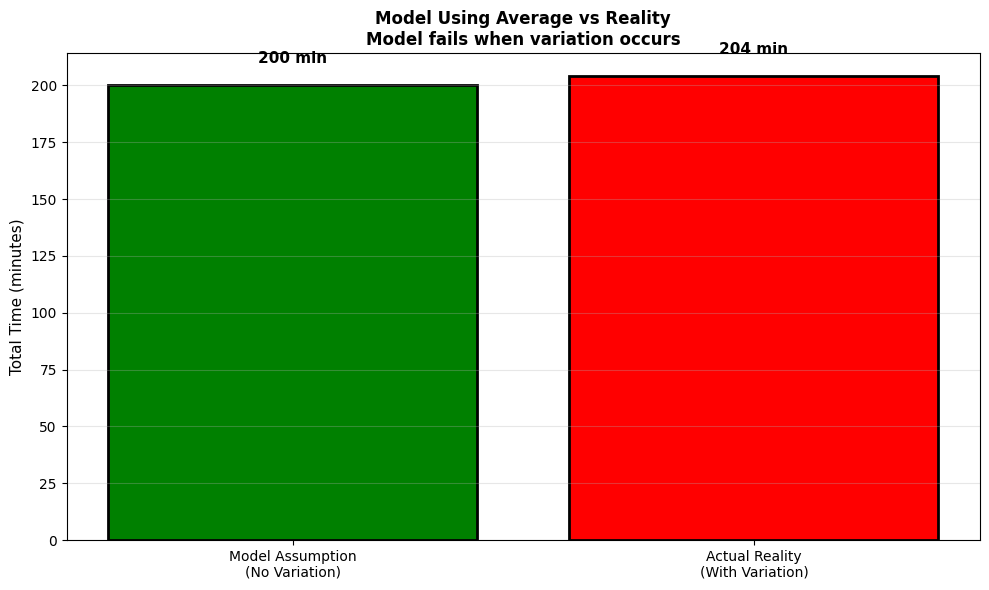

In [3]:
# Model uses average
units_to_produce = 20
model_assumption = avg_time  # Model assumes every unit takes exactly the average

total_time_model = units_to_produce * model_assumption

print("MODEL USING AVERAGE:")
print(f"  Parameter: {model_assumption:.1f} minutes (average)")
print(f"  Assumption: Every unit takes exactly {model_assumption:.0f} minutes")
print(f"  Units to produce: {units_to_produce}")
print(f"  Total time planned: {total_time_model:.0f} minutes")
print(f"\n⚠️  PROBLEM: Model assumes no variation!")
print(f"  But actual times vary from {min_time} to {max_time} minutes!")

# What actually happens?
# Simulate actual processing with variation
np.random.seed(42)
actual_times_sim = np.random.choice(processing_times, size=units_to_produce)
total_actual_time = np.sum(actual_times_sim)

time_difference = total_actual_time - total_time_model
difference_pct = (time_difference / total_time_model) * 100

print(f"\nWHAT ACTUALLY HAPPENS (with variation):")
print(f"  Actual total time: {total_actual_time} minutes")
print(f"  Model planned: {total_time_model:.0f} minutes")
print(f"  Difference: {time_difference:+.0f} minutes ({difference_pct:+.1f}%)")
print(f"  ⚠️  PROBLEM: Schedule fails! Takes {abs(time_difference):.0f} minutes {'longer' if time_difference > 0 else 'less'} than planned!")

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
scenarios = ['Model Assumption\n(No Variation)', 'Actual Reality\n(With Variation)']
times = [total_time_model, total_actual_time]
colors = ['green', 'red']

bars = ax.bar(scenarios, times, color=colors, edgecolor='black', linewidth=2)
ax.set_ylabel('Total Time (minutes)', fontsize=11)
ax.set_title('Model Using Average vs Reality\nModel fails when variation occurs', 
             fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

for bar, time in zip(bars, times):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
            f'{time:.0f} min', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


In [4]:
# Test multiple scenarios
scenarios = {
    'All Average': [avg_time] * units_to_produce,
    'Some Above Avg': [8, 9, 10, 10, 10, 11, 11, 12, 12, 12] * 2,
    'Some Below Avg': [8, 8, 8, 9, 9, 10, 10, 10, 11, 11] * 2,
    'Variable': actual_times_sim.tolist()
}

results = []

for scenario_name, times_list in scenarios.items():
    total = sum(times_list)
    diff = total - total_time_model
    diff_pct = (diff / total_time_model) * 100
    
    # Count how many are above/below average
    above_avg = sum(1 for t in times_list if t > avg_time)
    below_avg = sum(1 for t in times_list if t < avg_time)
    at_avg = sum(1 for t in times_list if t == avg_time)
    
    results.append({
        'Scenario': scenario_name,
        'Total Time': total,
        'Difference': f"{diff:+.0f} min",
        'Difference %': f"{diff_pct:+.1f}%",
        'Above Avg': above_avg,
        'At Avg': at_avg,
        'Below Avg': below_avg,
        'Works?': 'Yes' if abs(diff_pct) < 5 else 'No'
    })

results_df = pd.DataFrame(results)
print("WHY AVERAGES ARE MISLEADING:\n")
print(results_df.to_string(index=False))

print("\n\nKEY OBSERVATIONS:")
print("  - Only 'All Average' works (unlikely in reality)")
print("  - When values vary, model fails")
print("  - Variation is normal, but models using averages ignore it!")


WHY AVERAGES ARE MISLEADING:

      Scenario  Total Time Difference Difference %  Above Avg  At Avg  Below Avg Works?
   All Average       200.0     +0 min        +0.0%          0      20          0    Yes
Some Above Avg       210.0    +10 min        +5.0%         10       6          4     No
Some Below Avg       188.0    -12 min        -6.0%          4       6         10     No
      Variable       204.0     +4 min        +2.0%          8       8          4    Yes


KEY OBSERVATIONS:
  - Only 'All Average' works (unlikely in reality)
  - When values vary, model fails
  - Variation is normal, but models using averages ignore it!


## Step 5: Visualize the Problem

Let's visualize how variation causes problems:


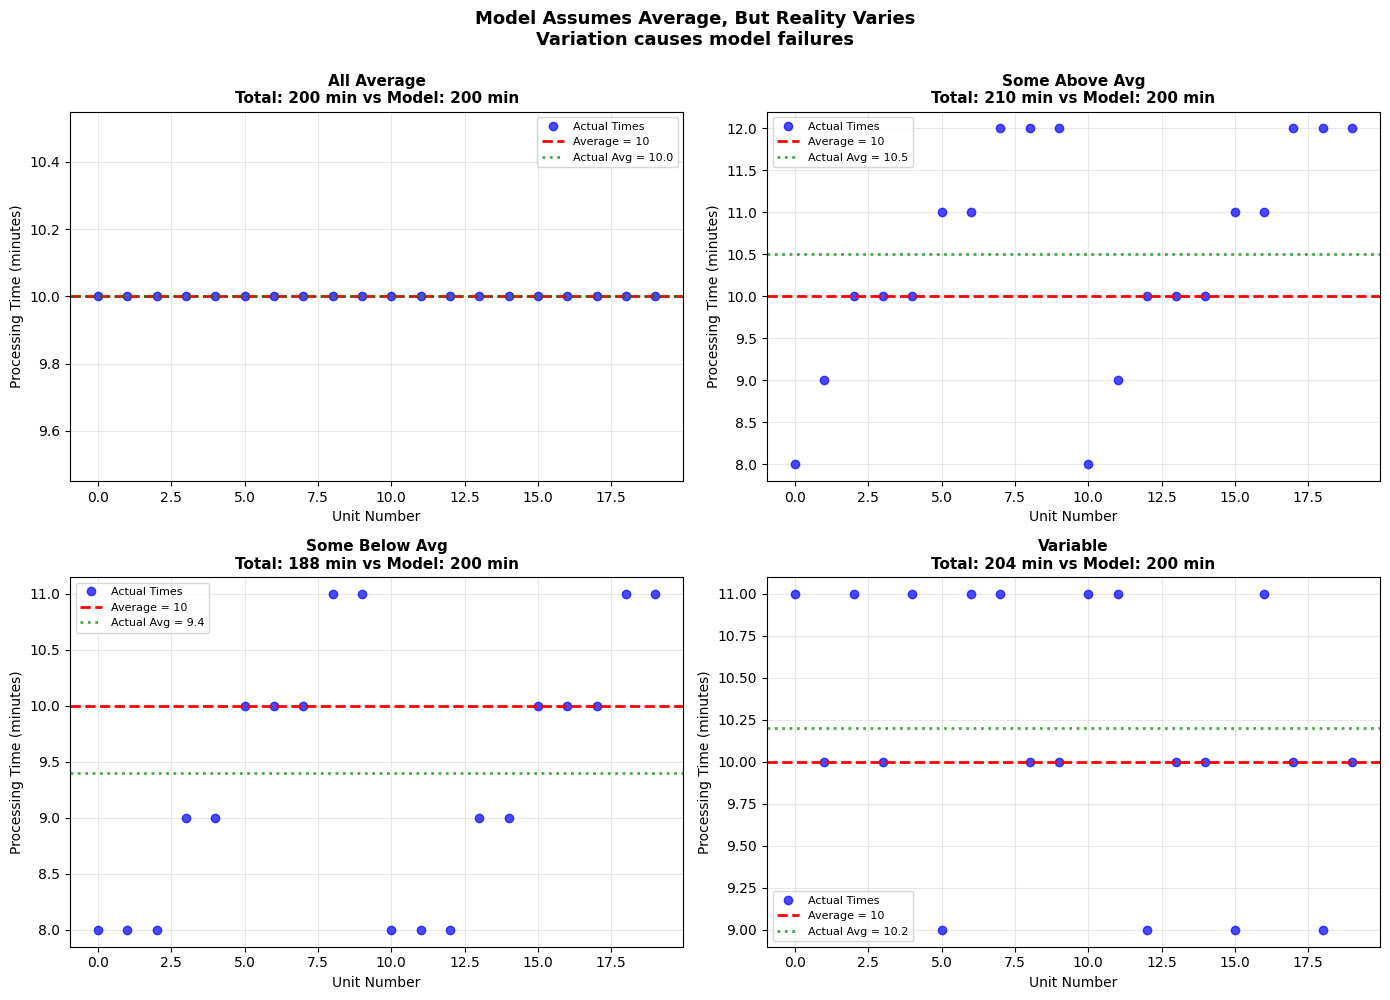


OBSERVATION:
  - Model assumes all values = average (red dashed line)
  - Reality has variation (blue dots)
  - When variation occurs, model fails!


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

scenario_idx = 0
for scenario_name, times_list in scenarios.items():
    ax = axes[scenario_idx // 2, scenario_idx % 2]
    
    # Plot individual times
    ax.plot(range(len(times_list)), times_list, 'o', color='blue', 
            markersize=6, alpha=0.7, label='Actual Times')
    
    # Average line
    ax.axhline(y=avg_time, color='red', linestyle='--', linewidth=2, 
               label=f'Average = {avg_time:.0f}')
    
    # Total time
    total = sum(times_list)
    ax.axhline(y=total/len(times_list), color='green', linestyle=':', 
               linewidth=2, alpha=0.7, label=f'Actual Avg = {total/len(times_list):.1f}')
    
    ax.set_xlabel('Unit Number', fontsize=10)
    ax.set_ylabel('Processing Time (minutes)', fontsize=10)
    ax.set_title(f'{scenario_name}\nTotal: {total:.0f} min vs Model: {total_time_model:.0f} min', 
                 fontsize=11, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3)
    
    scenario_idx += 1

plt.suptitle('Model Assumes Average, But Reality Varies\nVariation causes model failures', 
             fontsize=13, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\nOBSERVATION:")
print("  - Model assumes all values = average (red dashed line)")
print("  - Reality has variation (blue dots)")
print("  - When variation occurs, model fails!")


## Summary: Averages Hide Variation

**Key Takeaways:**

1. **Averages hide variation**
   - An average of 100 doesn't mean every value is 100
   - Values are distributed around the average
   - The distribution matters, not just the average

2. **Models using averages assume no variation**
   - They assume all values equal the average
   - This is rarely true in reality
   - When actual values differ, models fail

3. **Variation causes problems**
   - Higher than average → Stockouts, delays, capacity issues
   - Lower than average → Overstock, wasted resources
   - Variable → Both problems occur

4. **Practical implications**
   - Don't assume reality matches the average
   - Consider variation, not just averages
   - Test what happens if values differ from average
   - Account for variation in models

**Remember**: Averages describe typical values but don't guarantee reality will match. Always consider variation!
